In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [7]:
# Handle outliers in 'Age' and 'Fare' columns
df['Age'] = np.where(df['Age'] > df['Age'].quantile(0.99), df['Age'].median(), df['Age'])
df['Fare'] = np.where(df['Fare'] > df['Fare'].quantile(0.99), df['Fare'].median(), df['Fare'])

In [8]:
# Feature engineering - Extract deck information from 'Cabin' column
df['Deck'] = df['Cabin'].str.slice(0, 1)
df['Deck'] = df['Deck'].fillna('Unknown')

In [9]:
# Feature engineering - Create 'HasCabin' column
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [10]:
# Feature engineering - Create 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [11]:
# Binning 'Age' column into age groups
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

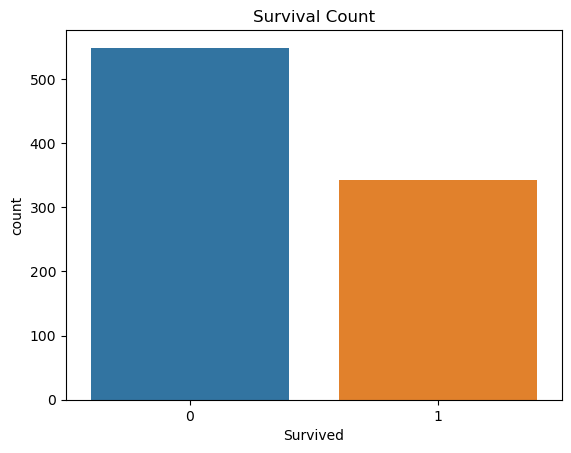

In [12]:
# Perform EDA

# Plot survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

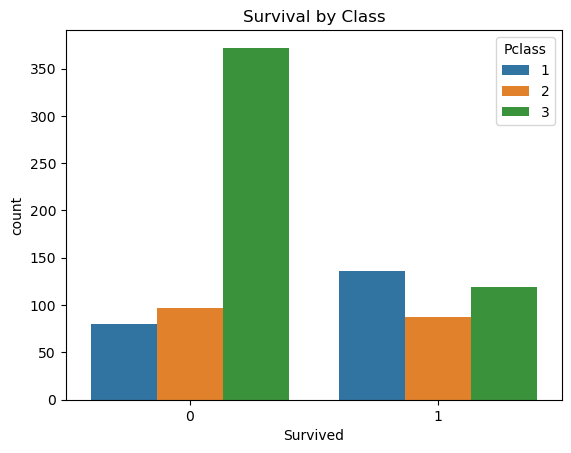

In [13]:
# Plot survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.show()

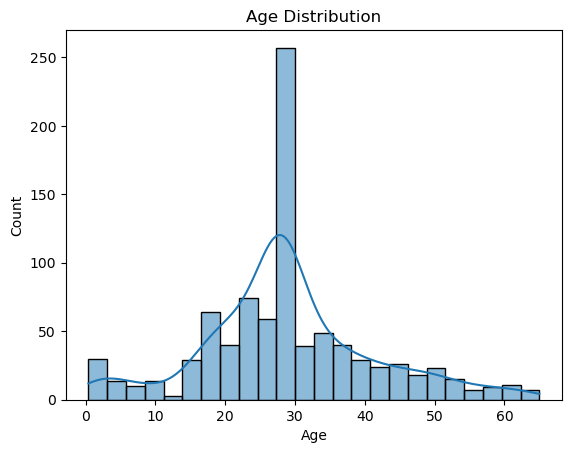

In [14]:
# Plot age distribution
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution')
plt.show()

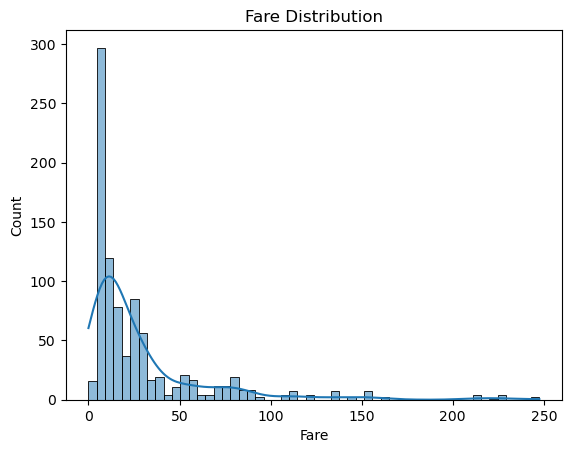

In [15]:
# Plot fare distribution
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution')
plt.show()

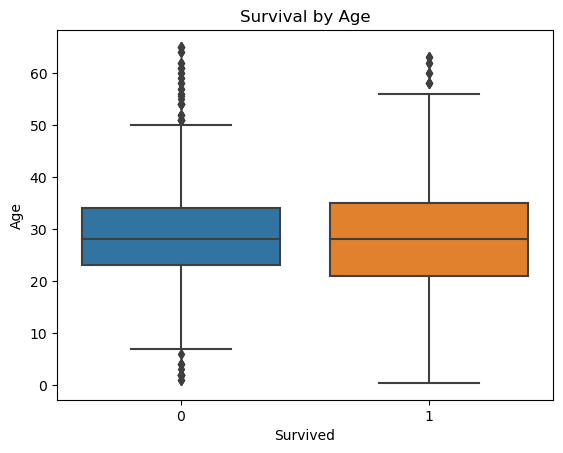

In [16]:
# Plot survival by age
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()

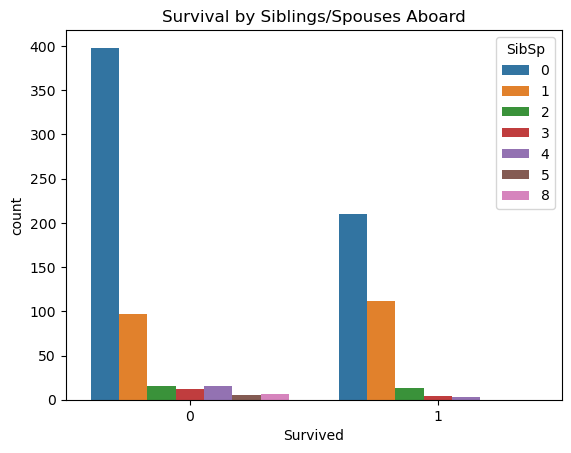

In [17]:
# Plot survival by number of siblings/spouses aboard
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival by Siblings/Spouses Aboard')
plt.show()

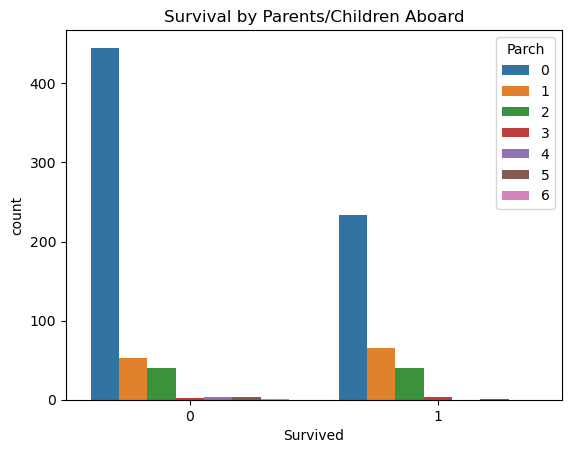

In [18]:
# Plot survival by number of parents/children aboard
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parents/Children Aboard')
plt.show()

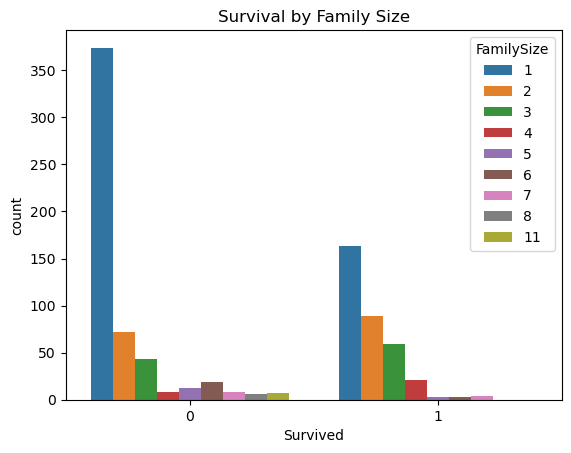

In [19]:
# Plot survival by family size
sns.countplot(x='Survived', hue='FamilySize', data=df)
plt.title('Survival by Family Size')
plt.show()

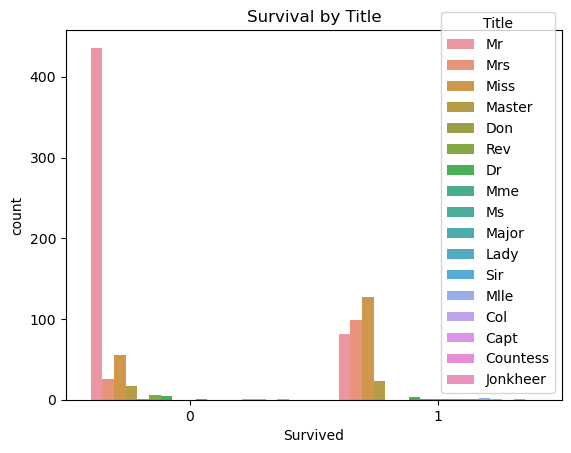

In [20]:
# Plot survival by title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
sns.countplot(x='Survived', hue='Title', data=df)
plt.title('Survival by Title')
plt.show()

In [21]:
# Calculate survival rate by class and sex
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

In [22]:
# Calculate survival rate by age group
survival_rate_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()

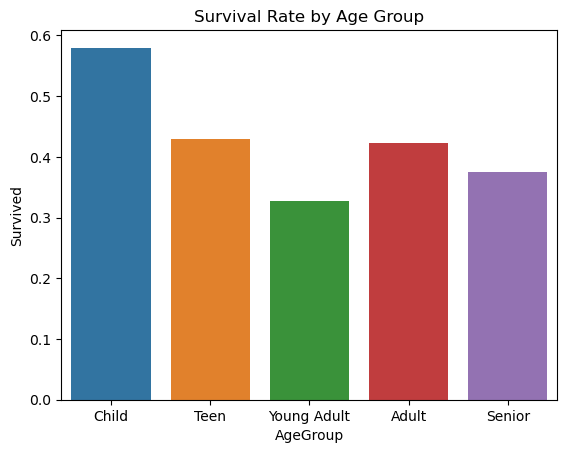

In [23]:
# Plot survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_age)
plt.title('Survival Rate by Age Group')
plt.show()

In [24]:
# Calculate correlation matrix
corr_matrix = df.corr()

C:\Users\sarve\AppData\Local\Temp\ipykernel_6080\3691153085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


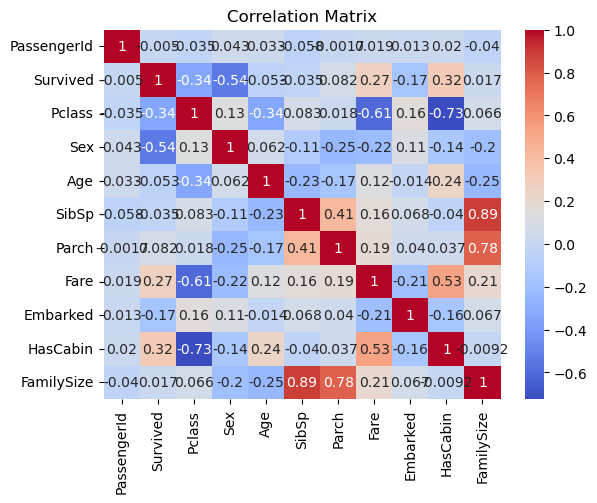

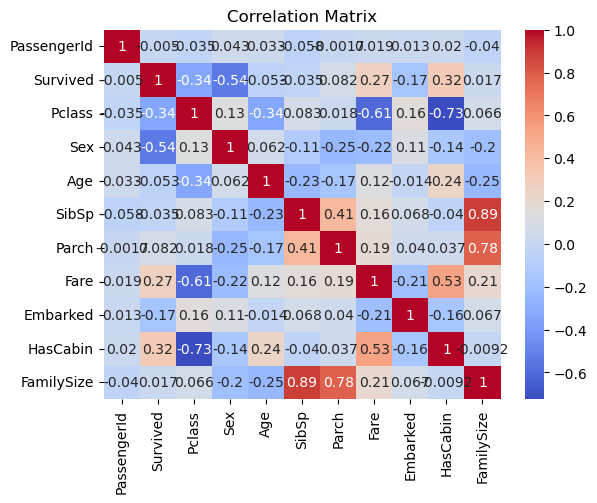

In [25]:
# Plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()# Plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()